<a href="https://colab.research.google.com/github/kanstat/Machine_learning/blob/main/handwritten_digit_reccog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#to load data from keras
(x_train, y_train), (X_test,Y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(X_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0
        ]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

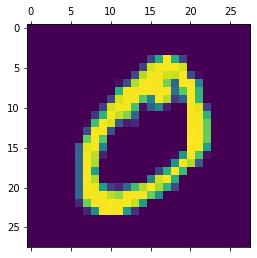

In [7]:
#to represent image
plt.matshow(x_train[1])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
#2 d image
x_train.shape

(60000, 28, 28)

In [11]:
#rescaling for better result
x_train = x_train/255
X_test = X_test/255

In [12]:
#flatten the image 
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = X_test.reshape(len(X_test),28*28)
x_train_flattened.shape
x_test_flattened.shape 

(10000, 784)

In [13]:
#we have converted 2d-1d
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
#model without hidden layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4729 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9256


In [27]:
model.evaluate(x_test_flattened,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2674 - accuracy: 0.9250


[0.2673584520816803, 0.925000011920929]

In [28]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

array([4.7209850e-01, 5.9389998e-03, 9.9935001e-01, 4.1574648e-01,
       5.4454946e-10, 8.8665122e-01, 8.6486542e-01, 2.2049741e-12,
       1.4206049e-01, 4.0970924e-09], dtype=float32)

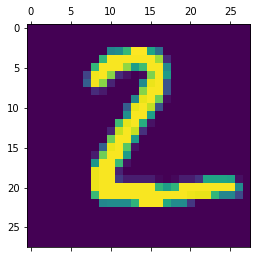

In [29]:
plt.matshow(X_test[1])

In [30]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[1])

2

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    1,    0,    6,    7,    4,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,    9,  919,   19,    7,    5,   13,   12,   37,    4],
       [   2,    0,   17,  919,    0,   29,    2,   14,   18,    9],
       [   1,    1,    3,    1,  899,    0,   13,    5,    9,   50],
       [   7,    3,    3,   32,    7,  786,   12,    7,   26,    9],
       [   8,    3,    6,    1,    7,   14,  914,    2,    3,    0],
       [   1,    5,   22,    6,    2,    1,    0,  961,    2,   28],
       [   5,    7,    7,   27,    9,   35,    9,   14,  848,   13],
       [  11,    7,    1,    8,   19,    8,    0,   24,    4,  927]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

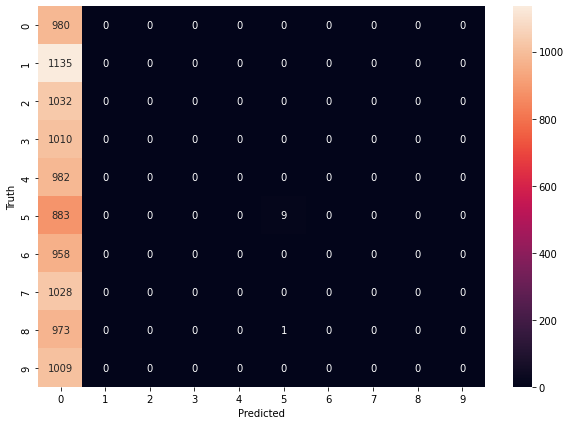

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
#making a model with hidden layer, hidden layer improve the perfomance
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
                       keras.layers.Dense(10,activation='relu')
                       
])    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3722 - accuracy: 0.0988
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3021 - accuracy: 0.0989
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3021 - accuracy: 0.0989
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3021 - accuracy: 0.0989
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3020 - accuracy: 0.0990


In [35]:
model.evaluate(x_test_flattened,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.3016 - accuracy: 0.0989


[2.3016388416290283, 0.09889999777078629]

In [37]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [40]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1135,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1032,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1010,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 982,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 883,    0,    0,    0,    0,    9,    0,    0,    0,    0],
       [ 958,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1028,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 973,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [1009,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>

Text(78.0, 0.5, 'Truth')

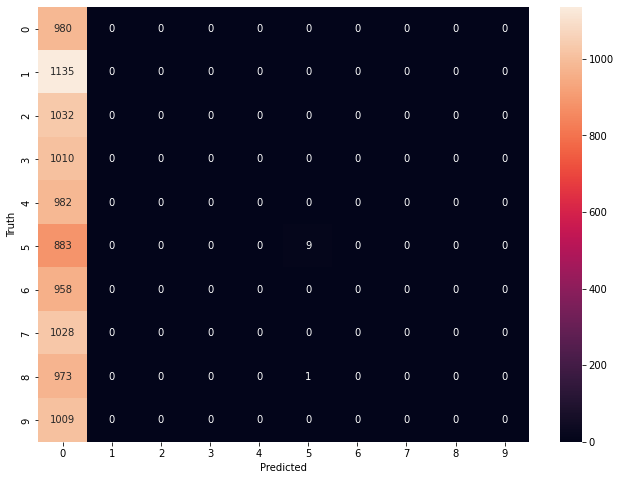

In [42]:
plt.figure(figsize = (11,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')